origin contiene: 8 dati null. Rappresentano il 0.16 % della colonna


,id,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,United States of America,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,United States of America,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...,...
4995,4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


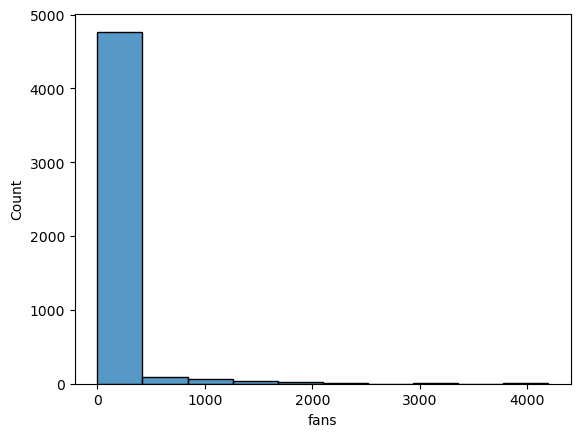

In [249]:
# task 1:
'''Importa db metal_bands_2017.

• Con Seaborn visualizziamo l'istogramma del numero dei fan delle varie band; 
cosa si vede? Cose ne deduciamo?'''

import pandas as pd
import seaborn as sns

df = pd.read_csv('metal_bands_2017.csv', encoding = 'latin1')

sns.histplot(data = df['fans'], bins = 10)

# ricerca dati null e la loro percentuale
if df.isna().sum().sum() > 0:
    for column in df.columns:
        n_null = df[column].isna().sum()
        percentuale_null = round((n_null / df.shape[0]) * 100, 2)
        if percentuale_null > 0:
            print(column, 'contiene:', n_null,'dati null. Rappresentano il', percentuale_null,'% della colonna')
else:
    print('il db NON presenta dati null')
    
df

<Axes: xlabel='totale fans', ylabel='paese di origine band'>

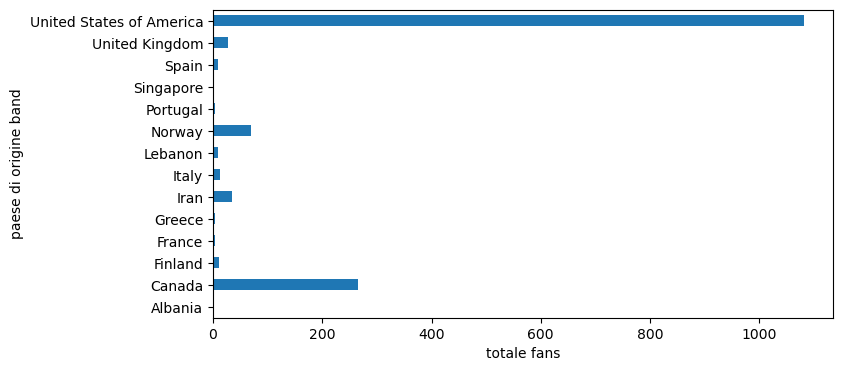

In [225]:
# task 2:
'''• Delle band che suonano sia Progressive che Thrash, 
realizziamo un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine

(nota: in questo caso specifico, per accedere alla colonna "style" dovremo usare ["style"]
e non .style perché quest'ultimo è un metodo).'''


progressive_thrash = (df.loc[:,'style'].str.contains('Progressive')) & (df.loc[:,'style'].str.contains('Thrash'))

df[progressive_thrash].groupby('origin')['fans'].sum().plot(kind='barh', figsize = (8,4), xlabel= 'totale fans', ylabel= 'paese di origine band')
#df[progressive_thrash].plot

<Axes: xlabel='formed', ylabel='Count'>

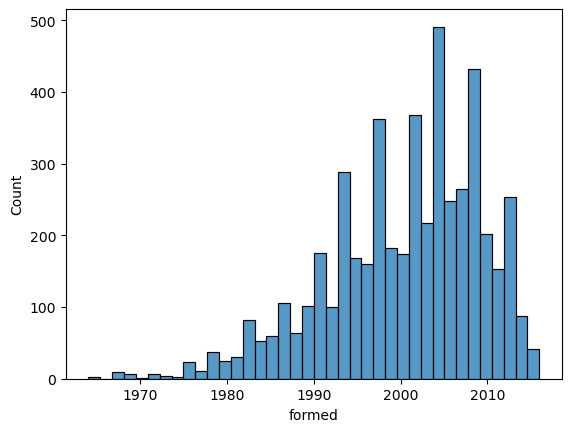

In [237]:
# task 3:
'''Visualizziamo un istogramma delle date di formazione
delle band (potremo dover convertire in qualche modo questo dato); 
si nota qualche trend?'''

df['formed']= pd.to_datetime(df['formed'], format = '%Y', errors = 'coerce')

pd.options.display.max_rows = 100

df = df.dropna(subset=['formed'])

df['formed'] = df['formed'].dt.year

sns.histplot(data = df, x = 'formed')